In [76]:
from utils import *
from blob import *

Let us vizualize one map of values with one generated blob

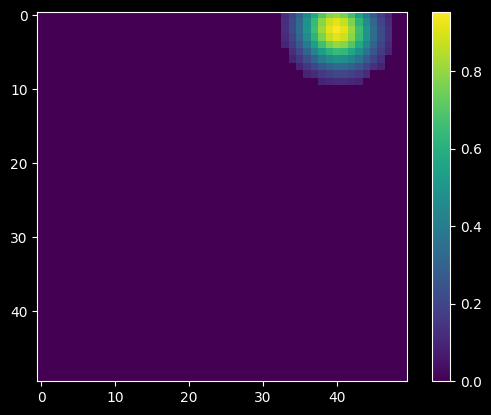

In [77]:
blob = Blob(grid_length=50)
blob_values = blob.get_blob_map(grid_length=50)
plt.imshow(blob_values)
plt.colorbar()

Now, create all the global latent maps

In [78]:
def create_latent_maps(grid_length=50):
    latent_global_maps = []
    centers_to_avoid = []
    all_blobs = [] #list of lists, each containing the blobs of a latent map
    k = 5
    for numMap in range(k):
        blobs, centers_to_avoid = get_random_blobs(grid_length=50, max_blobs=3, centers_to_avoid=centers_to_avoid)
        latent_global_maps.append(generate_global_map(grid_length=50, blobs=blobs))
        all_blobs.append(blobs)
    latent_global_maps = np.array(latent_global_maps)
    return latent_global_maps

In [79]:
latent_global_maps = []
centers_to_avoid = []
all_blobs = [] #list of lists, each containing the blobs of a latent map
k = 5
for numMap in range(k):
    blobs, centers_to_avoid = get_random_blobs(grid_length=50, max_blobs=3, centers_to_avoid=centers_to_avoid, dist_between_blobs=12)
    latent_global_maps.append(generate_global_map(grid_length=50, blobs=blobs))
    all_blobs.append(blobs)
latent_global_maps = np.array(latent_global_maps)
latent_global_maps.shape

/Users/jeandmr/Documents/MVA/Semestre 1/Machine Learning for Time Series/Project/project-mva-time-series/blob.py:94: RuntimeWarning: invalid value encountered in sqrt
  min_dist = np.min([np.sqrt(np.sum(existing_center **2 - center_new_blob**2)) for existing_center in centers_to_avoid])


(5, 50, 50)

Vizualization:

/var/folders/9k/c2_qmgms5bv_gzkb9tf_tc1w0000gn/T/ipykernel_28357/2051499805.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


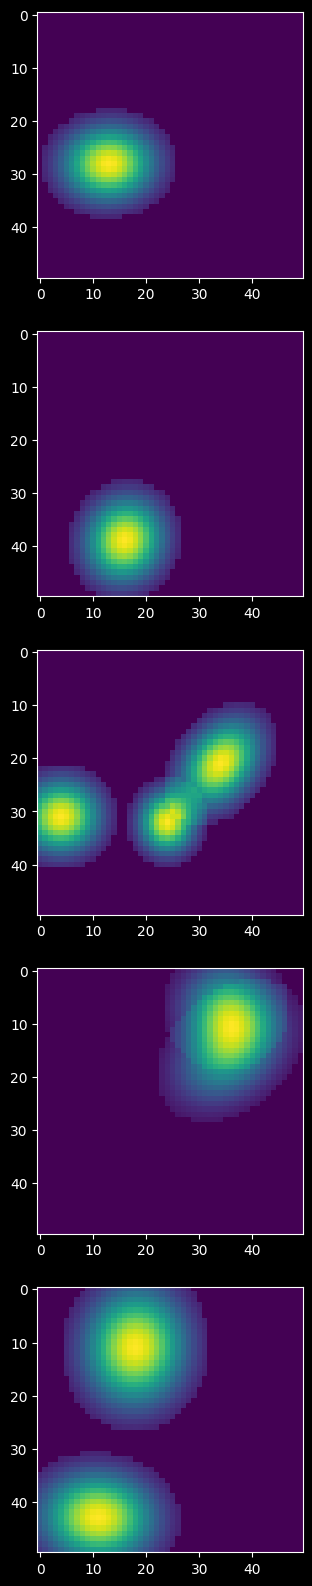

In [80]:
fig, ax = plt.subplots(k, figsize=(10, 20))
for i in range(k):
    ax[i].imshow(latent_global_maps[i, :,:])
fig.show()

In [83]:
def get_subject_blobs(all_blobs:List[List[Blob]], jitter=0, smoothness=0):
    """ 
    Returns the all_blobs list for one specific subject given the all_blobs GLOBAL list
    """
    all_subject_blobs = []
    for blob_list in all_blobs: #iterates over k the number of latent maps

        subject_blob_list = []
        for blob in blob_list: #iterates over the blobs of one specific latent map
            subject_blob = blob.get_copy() #avoid to lose info

            #add noise on both position and size of the blobs
            noise_on_width = np.random.normal(loc=0, scale=smoothness)
            if np.abs(noise_on_width) < blob.radius: #check that we don't have blob with negative radius
                subject_blob.radius += noise_on_width

            center_shift = np.random.normal(loc=0, scale=jitter, size=2).astype('int')
            
            #avoid losing blobs in the nature
            for coord in range(2):
                new_center_1d = center_shift[coord] + subject_blob.center[coord]
                while new_center_1d < 0 or new_center_1d > subject_blob.grid_length:
                    print("hello")
                    center_shift[coord] /= 2
            subject_blob.center += center_shift

            subject_blob_list.append(subject_blob)

        all_subject_blobs.append(subject_blob_list)

    return all_subject_blobs

In [84]:
all_subject_blobs = get_subject_blobs(all_blobs, jitter=6, smoothness=2)

In [85]:
latent_subject_maps = []
for numMap in range(k):
    latent_subject_maps.append(generate_global_map(grid_length=50, blobs=all_subject_blobs[numMap]))
latent_subject_maps = np.array(latent_subject_maps)
latent_subject_maps.shape


(5, 50, 50)

/var/folders/9k/c2_qmgms5bv_gzkb9tf_tc1w0000gn/T/ipykernel_28357/3032545269.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


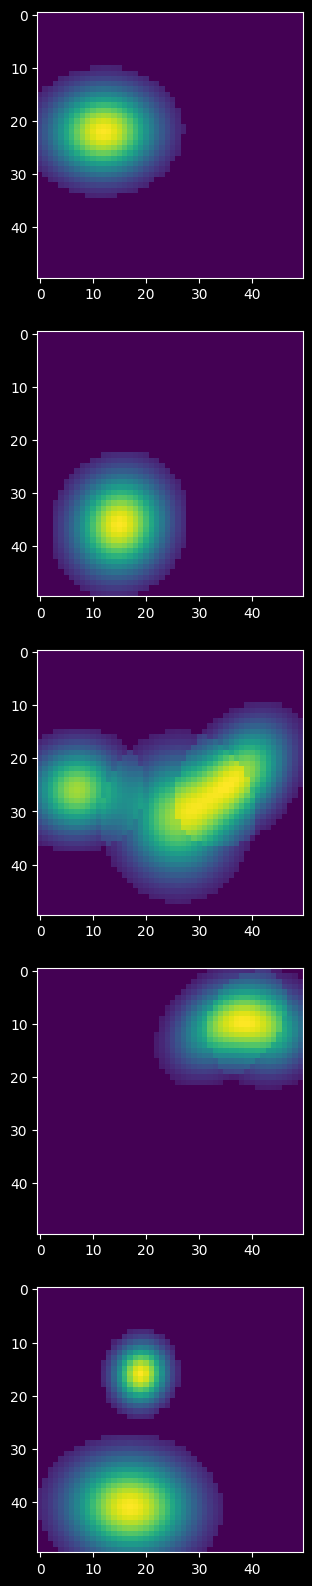

In [86]:
fig, ax = plt.subplots(k, figsize=(10, 20))
for i in range(k):
    ax[i].imshow(latent_subject_maps[i, :,:])
fig.show()

In [ ]:
def generate_correlated_noise(k, scale=1.0, correlation_length=10):
    # Generate grid coordinates
    x, y = np.meshgrid(np.arange(k), np.arange(k))
    coords = np.stack((x, y), axis=-1)

    # Create a covariance matrix based on distance
    distances = np.sqrt(np.sum((coords[:, :, np.newaxis, np.newaxis] - coords[np.newaxis, np.newaxis, :, :]) ** 2, axis=-1))
    covariance_matrix = np.exp(-distances / correlation_length)

    # Generate multivariate normal noise
    noise = np.random.multivariate_normal(mean=np.zeros(k**2), cov=covariance_matrix * scale).reshape(k, k)
    return noise

In [ ]:
def generate_synthetic_fmri_data(subjects, maps_per_subject, time_points, grid_size):
    """Generate synthetic fMRI data for multiple subjects."""
    data = np.zeros((subjects, maps_per_subject, grid_size, grid_size, time_points))

    for subject in range(subjects):
        for map_index in range(maps_per_subject):
            spatial_map = generate_global_map(grid_size, max_blobs=3)
            for time_point in range(time_points):
                time_series = np.random.rand(grid_size, grid_size)
                noise = gaussian_filter(np.random.randn(grid_size, grid_size), sigma=3)
                data[subject, map_index, :, :, time_point] = spatial_map * time_series + noise

    return data

In [ ]:


# Parameters
subjects = 12
maps_per_subject = 5
time_points = 150
grid_size = 50

# Generate synthetic fMRI data
synthetic_data = generate_synthetic_fmri_data(subjects, maps_per_subject, time_points, grid_size)

# Visualize one of the generated maps
plt.imshow(synthetic_data[0, 3, :, :, 0], cmap='gray')
plt.title("Sample Synthetic fMRI Map")
plt.colorbar()
plt.show()


TypeError: generate_global_map() got an unexpected keyword argument 'max_blobs'

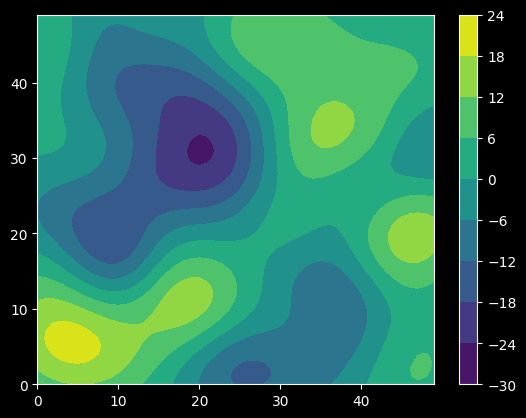

In [ ]:
grid_length = 50
noise = get_random_spatially_correlated_noise(grid_length=grid_length, correlation_scale=0.5)
plt.contourf(np.arange(grid_length), np.arange(grid_length), noise)
plt.colorbar()

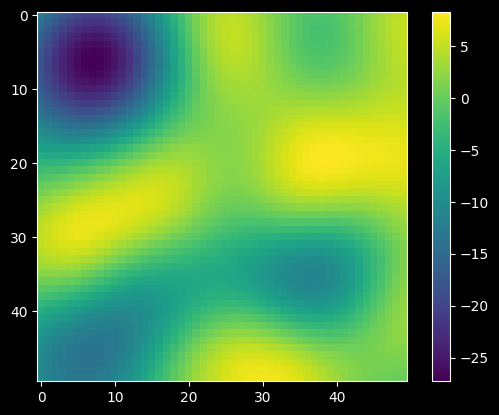

In [ ]:
plt.imshow(noise)
plt.colorbar()

In [ ]:
plt.imshow(generate_correlated_noise(50))

ValueError: cov must be 2 dimensional and square